In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df['AgeBins'] = train_df['Age'] // 10*10 
train_df['RelativesOnboard'] = train_df['SibSp'] + train_df['Parch']

In [6]:
test_df['AgeBins'] = test_df['Age'] // 10*10 
test_df['RelativesOnboard'] = test_df['SibSp'] + test_df['Parch']

In [7]:
train_df.head(10) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBins,RelativesOnboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20.0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10.0,1


In [8]:
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBins,RelativesOnboard
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,30.0,0
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,20.0,0
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,20.0,0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,20.0,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,30.0,5
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20.0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,30.0,0


In [9]:
test_df.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBins,RelativesOnboard
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,30.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,40.0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,60.0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,20.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,20.0,2


In [10]:
train_df.groupby(['Pclass'])['AgeBins'].mean()

Pclass
1    33.655914
2    25.433526
3    20.760563
Name: AgeBins, dtype: float64

In [11]:
train_df[['AgeBins', 'Survived']].groupby(['AgeBins']).mean()

,Survived
AgeBins,
0.0,0.612903
10.0,0.401961
20.0,0.350000
30.0,0.437126
40.0,0.382022
50.0,0.416667
60.0,0.315789
70.0,0.000000
80.0,1.000000


In [12]:
train_df[['RelativesOnboard', 'Survived']].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [13]:
train_df.shape

(891, 14)

In [14]:
train_df.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
AgeBins             177
RelativesOnboard      0
dtype: int64

In [15]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeBins,RelativesOnboard
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,25.252101,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,14.970969,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,20.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,20.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,30.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,10.000000


C:\Users\mmad\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mmad\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


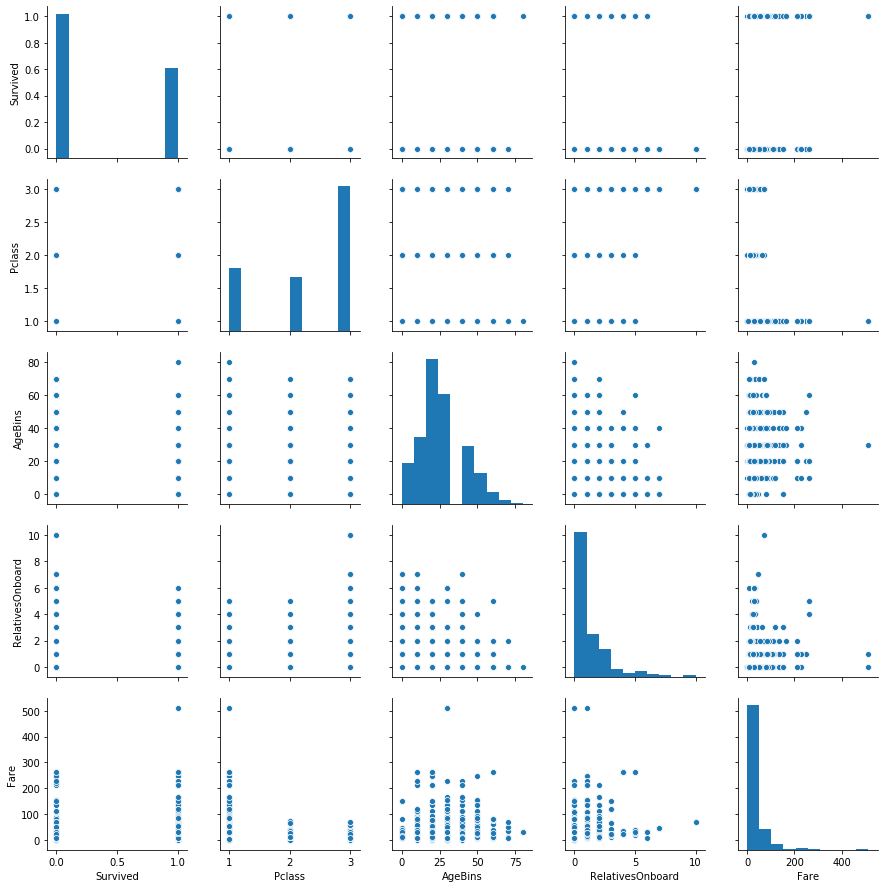

In [16]:
sbn.pairplot(train_df[['Survived', 'Pclass','AgeBins','RelativesOnboard','Fare']])

In [17]:
train_df.corr() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeBins,RelativesOnboard
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.038315,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.073029,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.352894,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.980586,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.300487,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.189679,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.089421,0.217138
AgeBins,0.038315,-0.073029,-0.352894,0.980586,-0.300487,-0.189679,0.089421,1.000000,-0.297373
RelativesOnboard,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,-0.297373,1.000000


In [18]:
corr_matrix = train_df.corr()
corr_matrix['Survived'].sort_values(ascending = False)

Survived            1.000000
Fare                0.257307
Parch               0.081629
RelativesOnboard    0.016639
PassengerId        -0.005007
SibSp              -0.035322
AgeBins            -0.073029
Age                -0.077221
Pclass             -0.338481
Name: Survived, dtype: float64

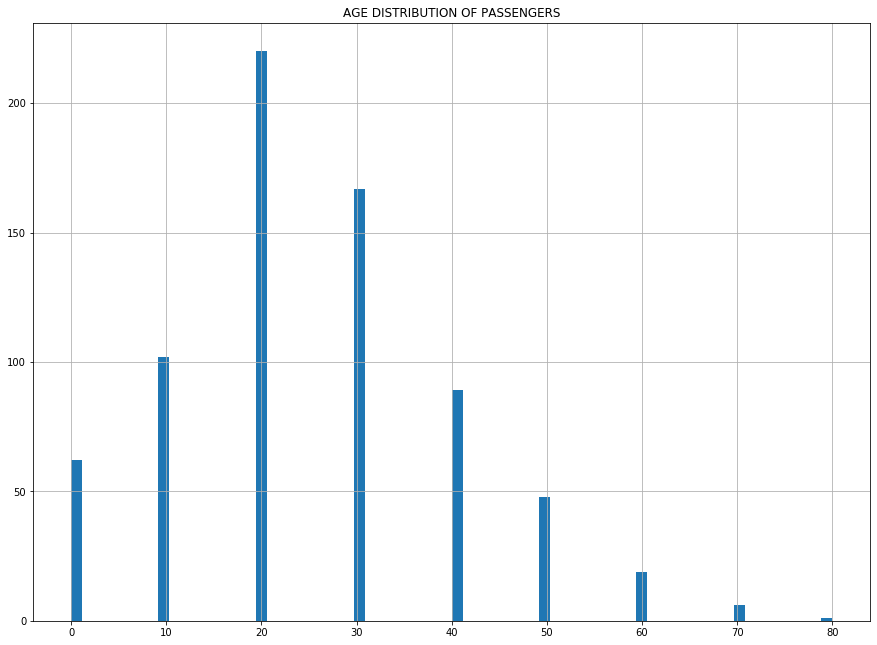

In [19]:
plt.figure(figsize = (15,11))
train_df.AgeBins.hist(bins = 70)
plt.title('AGE DISTRIBUTION OF PASSENGERS')
plt.show()  

In [20]:
train = train_df.drop(['Name', 'Sex','Ticket','Cabin','Embarked'], axis = 1)

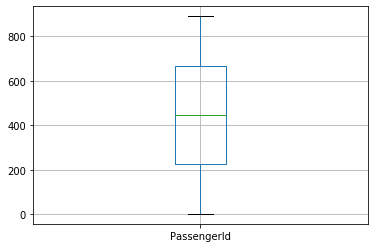

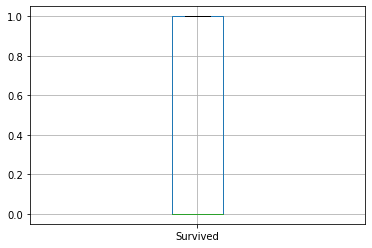

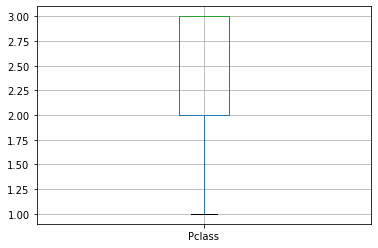

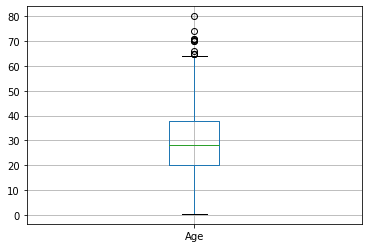

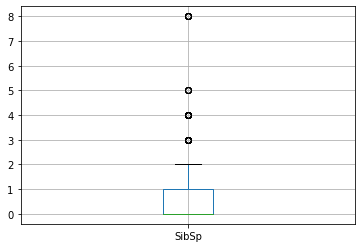

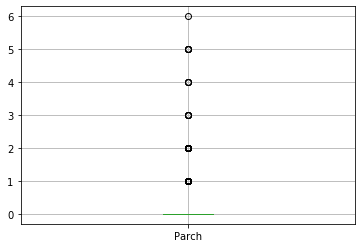

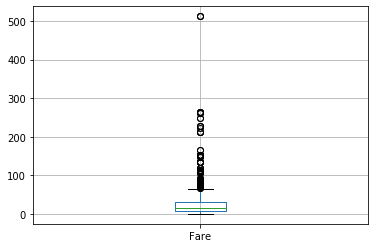

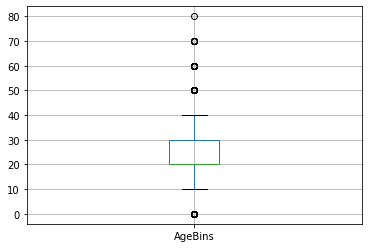

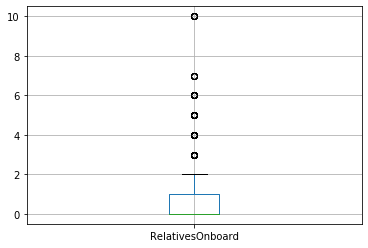

In [21]:
for column in train:
    plt.figure()
    train.boxplot([column])

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names] 

In [24]:
# Handling missing values on numerical variable
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
        ('select_numeric', DataFrameSelector(['AgeBins', 'RelativesOnboard','Fare'])),
        ('imputer', SimpleImputer(strategy='median')),
    ])

In [25]:
num_pipeline.fit_transform(train_df) 

array([[20.    ,  1.    ,  7.25  ],
       [30.    ,  1.    , 71.2833],
       [20.    ,  0.    ,  7.925 ],
       ...,
       [20.    ,  3.    , 23.45  ],
       [20.    ,  0.    , 30.    ],
       [30.    ,  0.    ,  7.75  ]])

In [26]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [27]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ('select_cat', DataFrameSelector(['Pclass', 'Sex', 'Embarked'])),
        ('imputer', MostFrequentImputer()),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [28]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ('num_pipeline', num_pipeline),
        ('cat_pipeline', cat_pipeline),
    ])

In [29]:
Xtrain = preprocess_pipeline.fit_transform(train_df) 
Xtest =  preprocess_pipeline.transform(test_df)
ytrain = train_df.Survived 

In [30]:
print('Xtrain:', Xtrain)
print('\n')
print('Xtest:', Xtest) 

Xtrain: [[20.      1.      7.25   ...  0.      0.      1.    ]
 [30.      1.     71.2833 ...  1.      0.      0.    ]
 [20.      0.      7.925  ...  0.      0.      1.    ]
 ...
 [20.      3.     23.45   ...  0.      0.      1.    ]
 [20.      0.     30.     ...  1.      0.      0.    ]
 [30.      0.      7.75   ...  0.      1.      0.    ]]


Xtest: [[30.      0.      7.8292 ...  0.      1.      0.    ]
 [40.      1.      7.     ...  0.      0.      1.    ]
 [60.      0.      9.6875 ...  0.      1.      0.    ]
 ...
 [30.      0.      7.25   ...  0.      0.      1.    ]
 [20.      0.      8.05   ...  0.      0.      1.    ]
 [20.      2.     22.3583 ...  1.      0.      0.    ]]


In [31]:
from sklearn.svm import SVC

svm_clf = SVC(gamma = 'auto')
svm_clf.fit(Xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, Xtrain, ytrain, cv=10) 
svm_scores

array([0.67777778, 0.73333333, 0.75280899, 0.74157303, 0.76404494,
       0.6741573 , 0.73033708, 0.74157303, 0.78651685, 0.80681818])

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_clf, Xtrain, ytrain, cv=10)
rf_scores

array([0.74444444, 0.84444444, 0.76404494, 0.87640449, 0.8988764 ,
       0.78651685, 0.84269663, 0.75280899, 0.79775281, 0.86363636])

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(Xtrain, ytrain)
sgd_scores = cross_val_score(sgd_clf, Xtrain, ytrain, cv = 10) 
sgd_scores

array([0.75555556, 0.64444444, 0.64044944, 0.68539326, 0.68539326,
       0.62921348, 0.80898876, 0.78651685, 0.7752809 , 0.72727273])

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights':['uniform', 'distance'], 'n_neighbors':[4,7,15]}]
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv = 10, verbose = 3, n_jobs = -1)
grid_search.fit(Xtrain, ytrain)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\mmad\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': [4, 7, 15],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [38]:
best_hyp_parameter = grid_search.best_params_ 
print('best_parameter:',best_hyp_parameter)

best_parameter: {'n_neighbors': 15, 'weights': 'distance'}


In [39]:
best_score = grid_search.best_score_ 
print('Accuracy:',best_score)

Accuracy: 0.7564534231200898


In [40]:
print('rf_scores:',  rf_scores.mean())
print('svm_scores:',svm_scores.mean())
print('knn_scores:',best_score)
print('sgd_scores:',sgd_scores.mean())

rf_scores: 0.817162637612076
svm_scores: 0.7408940528884348
knn_scores: 0.7564534231200898
sgd_scores: 0.7138508682328907
